In [26]:
!pip install joblib

In [4]:
from google.colab import data_table
data_table.enable_dataframe_formatter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#Preproccessing

(60000, 785)
train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None
test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None
              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000 

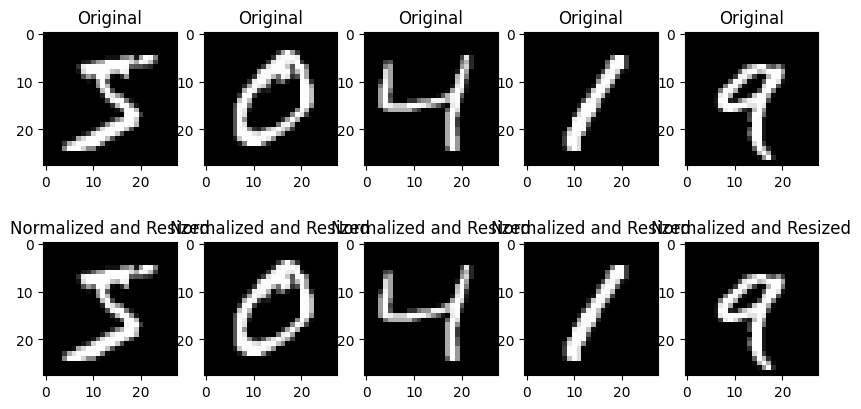

test images plot


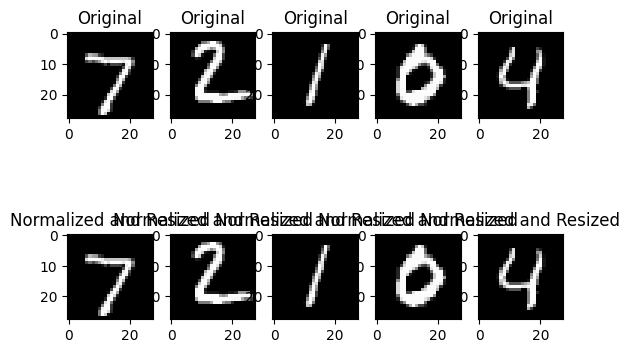

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for chunk in pd.read_csv("mnist_train.csv", chunksize=1000):
    train_data = pd.concat([train_data, chunk])

for chunk in pd.read_csv("mnist_test.csv", chunksize=1000):
    test_data = pd.concat([test_data, chunk])

df_train_data = pd.DataFrame(train_data)
categorical_columns=['label']
print(df_train_data.shape)
df_test_data = pd.DataFrame(test_data)
print('train data info:')
print(df_train_data.info())
print('test data info:')
print(df_test_data.info())
print(df_train_data.describe())
print('num of nulls in train data')
print(df_train_data.isnull().sum().sum())
print('num of nulls in test data')
print(df_test_data.isnull().sum().sum())
df_train_data = df_train_data.dropna()
df_test_data = df_test_data.dropna()

# Display unique values for each column
print('Number of Unique Values in train data:')
for column in df_train_data.columns:
    unique_values_count = df_train_data[column].nunique()
    print(f'Column: {column}, Number of Unique Values: {unique_values_count}')
print("..........................................................................................\n")
print("..........................................................................................\n")
print('Number of Unique Values in test data:')
for column in df_test_data.columns:
    unique_values_count = df_test_data[column].nunique()
    print(f'Column: {column}, Number of Unique Values: {unique_values_count}')


print("..........................................................................................\n")
print("..........................................................................................\n")
df_train_data['label'] = df_train_data['label'].astype(object)
X = df_train_data.drop('label', axis=1)
X_normalized_train = df_train_data / 255.0
label_encoder = LabelEncoder()
df_train_data['label'] = label_encoder.fit_transform(df_train_data['label'])

df_train_y = df_train_data['label']
train_encoded = pd.concat([df_train_y, X], axis=1)


# sns.histplot(df_train_data)
# plt.show()


df_test_data['label'] = df_test_data['label'].astype(object)
X = df_test_data.drop('label', axis=1)
X_normalized = df_test_data / 255.0
label_encoder = LabelEncoder()
df_test_data['label'] = label_encoder.fit_transform(df_test_data['label'])

y = df_test_data['label']
test_encoded = pd.concat([y, X], axis=1)


# sns.histplot(df_test_data)
# plt.show()




# def normalize_pixels(row):
#     # Extract pixel values from the row (excluding the label)


#     # Normalize pixel values to the range [0, 1]
#     normalized_pixels = row / 255.0

#     return normalized_pixels


def resize_image(normalized_pixels):
    # Reshape the pixel values to 28x28
    # Extract pixel values from the row (excluding the first value, which is the label)
    pixels = normalized_pixels.iloc[1:].values.reshape((28, 28))

    # Create a Pillow image from the normalized pixel values
    img = Image.fromarray((pixels * 255).astype(np.uint8))

    # Resize the image to 28 by 28
    resized_img = img.resize((28, 28))

    return resized_img
# Apply the normalization and resize function to each row in the DataFrame
resized_train = X_normalized_train.apply(resize_image, axis=1)
resized_test = X_normalized.apply(resize_image, axis=1)
# Visualize some normalized and resized images
num_images_to_visualize = 5

plt.figure(figsize=(10, 5))

for i in range(num_images_to_visualize):
    # Original image (before normalization and resizing)
    plt.subplot(2, num_images_to_visualize, i + 1)
    original_img = Image.fromarray(train_encoded.iloc[i, 1:].values.reshape((28, 28)).astype(np.uint8))
    plt.imshow(original_img, cmap='gray')
    plt.title('Original')

    # Normalized and resized image
    plt.subplot(2, num_images_to_visualize, i + 1 + num_images_to_visualize)
    plt.imshow(resized_train.iloc[i], cmap='gray')
    plt.title('Normalized and Resized')
print('train images plot')
plt.show()

for i in range(num_images_to_visualize):
    # Original image (before normalization and resizing)
    plt.subplot(2, num_images_to_visualize, i + 1)
    original_img = Image.fromarray(test_encoded.iloc[i, 1:].values.reshape((28, 28)).astype(np.uint8))
    plt.imshow(original_img, cmap='gray')
    plt.title('Original')

    # Normalized and resized image
    plt.subplot(2, num_images_to_visualize, i + 1 + num_images_to_visualize)
    plt.imshow(resized_test.iloc[i], cmap='gray')
    plt.title('Normalized and Resized')
print('test images plot')
plt.show()


# Extract features and labels
X_train, y_train = train_data.iloc[:, 1:], train_data['label']
X_test = test_data.iloc[:, 1:]
y_test = test_data['label']

# Data Preprocessing
X_train /= 255.0
X_test /= 255.0

# Resize images to dimensions of 28 by 28
image_size = 28
X_train = X_train.values.reshape(-1, image_size, image_size)
X_test = X_test.values.reshape(-1, image_size, image_size)

# Split the training data into training and validation sets
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Split the data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_normalized_train,
    df_train_y,
    test_size=0.2,
    random_state=42
)

#KNN Model

In [10]:


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define the k-NN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to search
param_grid = {'n_neighbors': [ 3,5, 9,7,11], 'weights': ['uniform', 'distance']}

# Use GridSearchCV to perform a grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.9735833333333334


In [35]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras


# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
y_train_ann_one_hot = label_binarizer.fit_transform(y_train_ann)
y_val_ann_one_hot = label_binarizer.transform(y_val_ann)

# Architecture 1
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_size, image_size)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train model1
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.fit(X_train_ann, y_train_ann_one_hot, epochs=10, batch_size=64, validation_data=(X_val_ann, y_val_ann_one_hot))

# Evaluate model1 on test set
y_pred_ann1 = np.argmax(model1.predict(X_test), axis=-1)
accuracy_ann1 = accuracy_score(y_test, y_pred_ann1)
print(f"Accuracy for Architecture 1: {accuracy_ann1}")

# Architecture 2
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_size, image_size)),
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train model2
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(X_train_ann, y_train_ann_one_hot, epochs=15, batch_size=128, validation_data=(X_val_ann, y_val_ann_one_hot))

# Evaluate model2 on test set
y_pred_ann2 = np.argmax(model2.predict(X_test), axis=-1)
accuracy_ann2 = accuracy_score(y_test, y_pred_ann2)
print(f"Accuracy for Architecture 2: {accuracy_ann2}")

Epoch 1/10
750/750 [==============================] - 14s 16ms/step - loss: 0.3396 - accuracy: 0.9066 - val_loss: 0.1980 - val_accuracy: 0.9440
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 0.1590 - accuracy: 0.9543 - val_loss: 0.1361 - val_accuracy: 0.9597
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.1140 - val_accuracy: 0.9664
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0851 - accuracy: 0.9752 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0652 - accuracy: 0.9814 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0955 - val_accuracy: 0.9726
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0430 - accuracy: 0.9878 - val_loss: 0.0948 - val_accuracy: 0.9707
Ep

In [36]:
#
Models = [(accuracy, 'Knn'), (accuracy_ann1, 'Ann Model 1'), (accuracy_ann2, 'Ann Model 2')]

# Find the pair with the maximum first element
max_pair = max(Models, key=lambda x: x[0])

highest_Model = max_pair[1]

if highest_Model == 'Knn':
  conf_matrix = confusion_matrix(y_valid, y_pred)
  print("Knn:\n")
  print("Confusion Matrix:")
  print(conf_matrix)
elif highest_Model == 'Ann Model 1':
  print("Ann Model 1:\n")
  conf_matrix = confusion_matrix(y_test, y_pred_ann1)
  print("Confusion Matrix:")
  print(conf_matrix)
else:
  conf_matrix = confusion_matrix(y_test, y_pred_ann2)
  print("Ann Model 2:\n")
  print("Confusion Matrix:")
  print(conf_matrix)



Ann Model 1:

Confusion Matrix:
[[ 970    0    1    1    1    2    1    1    1    2]
 [   0 1121    4    3    0    1    2    0    4    0]
 [   5    0 1012    1    1    0    1    7    5    0]
 [   0    0    7  981    0   14    0    1    3    4]
 [   1    0    4    0  955    0    3    3    1   15]
 [   2    1    0    2    2  879    2    1    2    1]
 [   7    2    3    0    4   21  918    0    3    0]
 [   1    3   13    3    1    0    0  992    4   11]
 [   5    0    4    4    3    9    0    2  943    4]
 [   0    2    0    4    8    7    2    5    1  980]]


In [37]:
# from sklearn.externals import joblib
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model

# Assuming you have trained KNN model, model1, and model2

# Save the best model
if highest_Model == 'Knn':
    joblib.dump(best_knn_model, 'best_knn_model.joblib')
elif highest_Model == 'Ann Model 1':
    model1.save('best_ann_model1.csv')
else:
    model2.save('best_ann_model2.csv')

# Reload the best model
if highest_Model == 'Knn':
    loaded_model = joblib.load('best_knn_model.joblib')
elif highest_Model == 'Ann Model 1':
    loaded_model = load_model('best_ann_model1.csv')
else:
    loaded_model = load_model('best_ann_model2.csv')



In [38]:
# Use the loaded model on testing data from mnist_test.csv
# Assuming you have loaded and preprocessed the testing data as X_test and y_test

if highest_Model == 'Knn':
    y_pred_test = loaded_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    print("Best Knn Model on Testing Data:\n")
    print(f"Accuracy: {accuracy_test}")
    print("Confusion Matrix:")
    print(conf_matrix_test)
elif highest_Model == 'Ann Model 1' or highest_Model == 'Ann Model 2':
    X_test_reshaped = X_test.reshape((-1, image_size, image_size))  # Reshape if necessary
    y_test_one_hot = label_binarizer.transform(y_test.astype(int))
    accuracy_test = loaded_model.evaluate(X_test_reshaped, y_test_one_hot)[1]
    y_pred_test = np.argmax(loaded_model.predict(X_test_reshaped), axis=-1)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    print(f"Best {highest_Model} on Testing Data:\n")
    print(f"Accuracy: {accuracy_test}")
    print("Confusion Matrix:")
    print(conf_matrix_test)


313/313 [==============================] - 1s 2ms/step
Best Ann Model 1 on Testing Data:

Accuracy: 0.9750999808311462
Confusion Matrix:
[[ 970    0    1    1    1    2    1    1    1    2]
 [   0 1121    4    3    0    1    2    0    4    0]
 [   5    0 1012    1    1    0    1    7    5    0]
 [   0    0    7  981    0   14    0    1    3    4]
 [   1    0    4    0  955    0    3    3    1   15]
 [   2    1    0    2    2  879    2    1    2    1]
 [   7    2    3    0    4   21  918    0    3    0]
 [   1    3   13    3    1    0    0  992    4   11]
 [   5    0    4    4    3    9    0    2  943    4]
 [   0    2    0    4    8    7    2    5    1  980]]
